In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [97]:
E4_df = pd.read_csv("/Users/cmdb/qbb2021-answers/qbio_week4/E4_promoter_meth.txt", delimiter = '\t', header = None)
E5_df = pd.read_csv("/Users/cmdb/qbb2021-answers/qbio_week4/E5.5_promoter_meth.txt", delimiter = '\t', header = None)


In [98]:
E4_df.head()

,0,1,2,3,4,5,6
0,chr6,50108240,50110240,Mpp6,0,+,0.000000
1,chr6,50261769,50263769,Dfna5,0,-,0.000000
2,chr6,50382837,50384837,Osbpl3,0,-,0.000000
3,chr6,50566474,50568474,Cycs,0,-,133.333333
4,chr6,50570397,50572397,Mir6371,0,+,700.000000


In [75]:
E5_df.head()

,0,1,2,3,4,5,6
0,chr6,50108240,50110240,Mpp6,0,+,100.000000
1,chr6,50261769,50263769,Dfna5,0,-,950.000000
2,chr6,50382837,50384837,Osbpl3,0,-,1650.000000
3,chr6,50566474,50568474,Cycs,0,-,650.000000
4,chr6,50570397,50572397,Mir6371,0,+,1916.666667


In [36]:
E4_df[6] = pd.to_numeric(E4_df[6])
E5_df[6] = pd.to_numeric(E5_df[6])

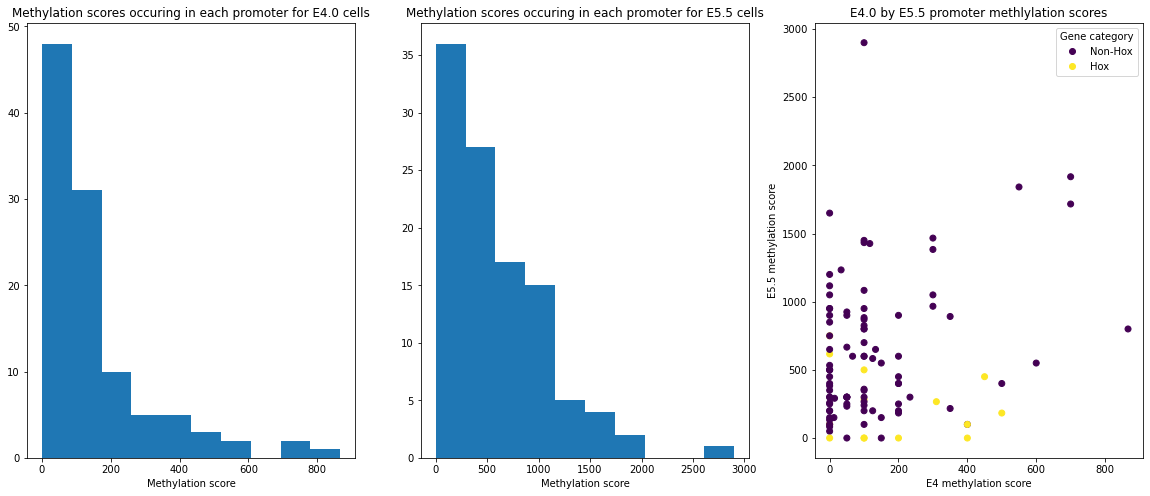

In [74]:
fig,axes = plt.subplots(1,3, figsize = (20,8))
axes[0].hist(E4_df[6])
axes[0].set_title("Methylation scores occuring in each promoter for E4.0 cells")
axes[0].set_xlabel("Methylation score")

axes[1].hist(E5_df[6])
axes[1].set_title("Methylation scores occuring in each promoter for E5.5 cells")
axes[1].set_xlabel("Methylation score")

axes[2].scatter(E4_df[6], E5_df[6], c = E4_df[3].str.contains("Hox"), label = "Hox")
axes[2].set_title("E4.0 by E5.5 promoter methlylation scores")
axes[2].set_xlabel("E4 methylation score")
axes[2].set_ylabel("E5.5 methylation score")
axes[2].legend(handles=scatter.legend_elements()[0], 
           labels=["Non-Hox", "Hox"],
           title="Gene category")


In [78]:
#t-test
roi = E4_df[3].str.contains("Hox")
roi2 = E5_df[3].str.contains("Hox")

In [84]:
E4_hox = E4_df.loc[roi][6]
E4_other = E4_df.loc[roi == False][6]

In [87]:
# t test between Hox and other genes in E4
stats.ttest_ind(E4_hox, E4_other)

Ttest_indResult(statistic=1.3120847753050175, pvalue=0.192352780310549)

In [90]:
E5_hox = E5_df.loc[roi2][6]
E5_other = E5_df.loc[roi2 == False][6]

In [92]:
# t test between Hox and other genes in E5.5
stats.ttest_ind(E5_hox, E5_other)

Ttest_indResult(statistic=-2.8618380769825458, pvalue=0.0050844215499579294)